# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb

from pdpbox import pdp, get_dataset, info_plots

import matplotlib.pyplot as plt
%matplotlib inline

# get dataset and model

In [2]:
test_titanic = get_dataset.titanic()
print(test_titanic.keys())

titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

dict_keys(['xgb_model', 'data', 'features', 'target'])


In [3]:
titanic_data.shape

(891, 14)

# 1. Binary feature: Sex

## 1.1 target distribution through feature 'Sex'

In [7]:
titanic_data[titanic_target]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

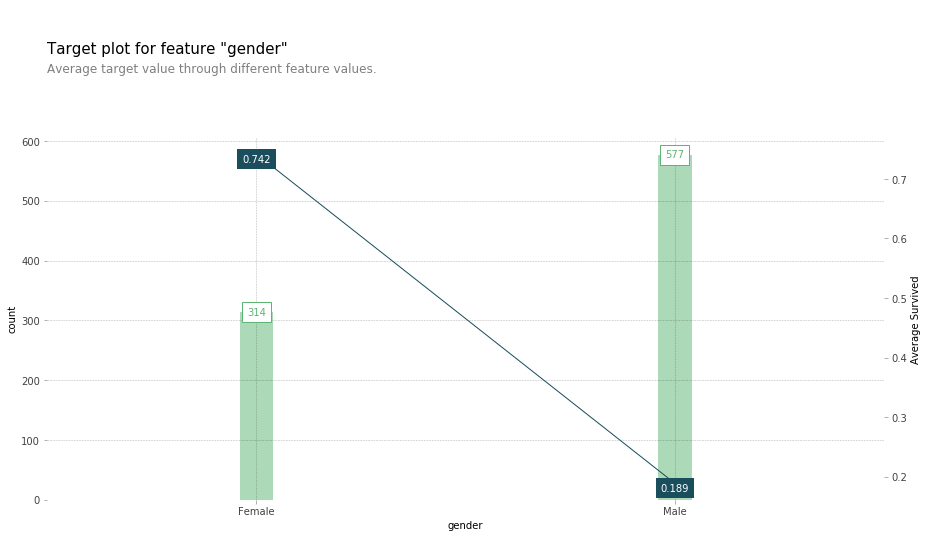

In [9]:
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_data, feature='Sex', feature_name='gender', target=titanic_target
)
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

In [10]:
summary_df

,x,display_column,count,Survived
0,0,Sex_0,314,0.742038
1,1,Sex_1,577,0.188908


## 1.2 check prediction distribution through feature 'Sex'

In [4]:
lgb_params = {'num_leaves': 16,
         'objective': 'binary',
         'max_depth': -1,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "colsample_bytree": 0.8,
         "subsample": 0.8,
         "bagging_seed": 11,
         "lambda_l1": 0.15,
         "lambda_l2": 1,
         "random_state": 42}
clf = lgb.LGBMClassifier(**lgb_params)
clf.fit(titanic_data[titanic_features], titanic_data[titanic_target])

LGBMClassifier(bagging_seed=11, boosting='gbdt', boosting_type='gbdt',
               class_weight=None, colsample_bytree=0.8, importance_type='split',
               lambda_l1=0.15, lambda_l2=1, learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=16, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

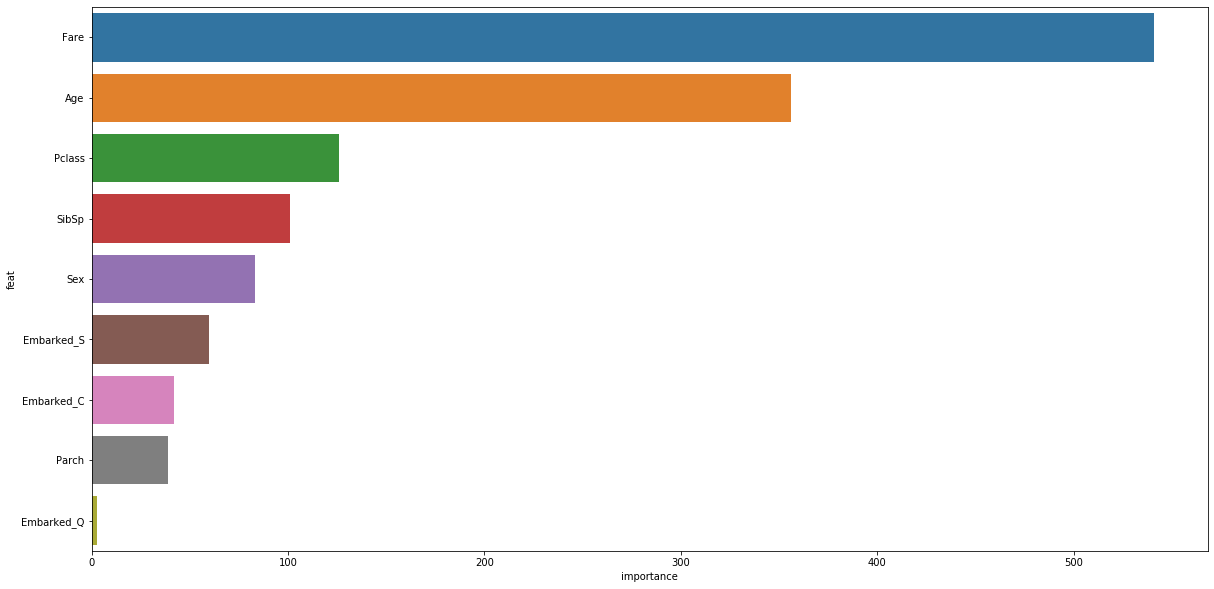

In [4]:
def plot_featImp(feature, lgb_model):
    """
    绘制特征的重要性
    input:
        feature：特征
        lgb_model:训练后的模型
    """
    featImp = pd.DataFrame()
    featImp['feat'] = feature
    featImp['importance'] = lgb_model.feature_importances_ 
    featImp = featImp.sort_values('importance',ascending = False)

    plt.figure(figsize=[20,10])
    sns.barplot(x = 'importance', y ='feat',data = featImp[:20],orient='h')
    plt.show

plot_featImp(titanic_features, clf)

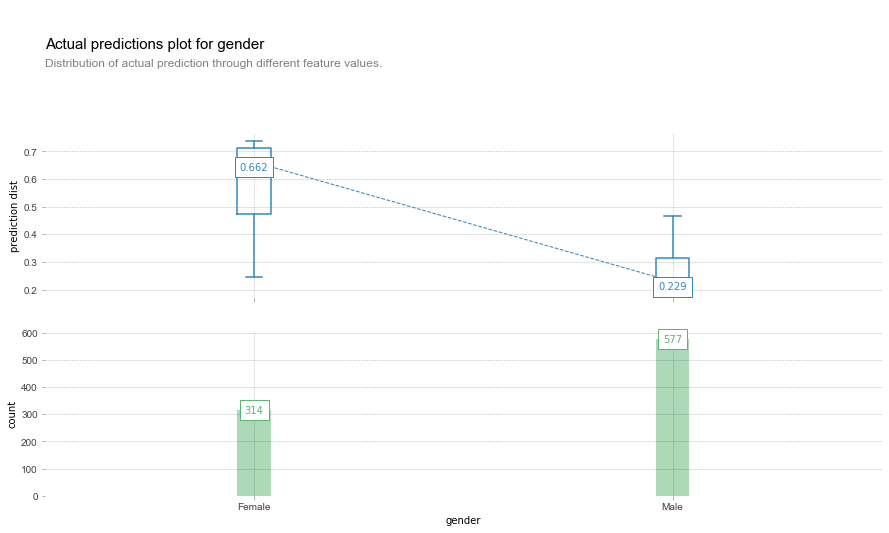

In [5]:
fig, axes, summary_df = info_plots.actual_plot(
    model=clf, X=titanic_data[titanic_features], feature='Sex', feature_name='gender',predict_kwds=lgb_params
)
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

In [19]:
summary_df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,Sex_0,314,0.472768,0.661935,0.711168
1,1,Sex_1,577,0.211363,0.228875,0.314379


## 1.3 pdp for feature 'Sex'

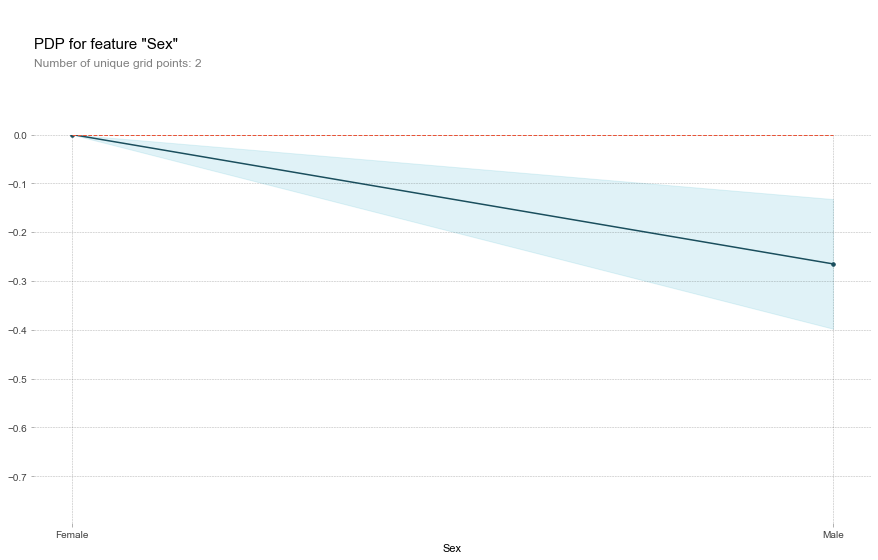

In [5]:
pdp_sex = pdp.pdp_isolate(
    model=clf, dataset=titanic_data, model_features=titanic_features, feature='Sex'
)
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'Sex')
_ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

In [6]:
pdp.pdp_sex

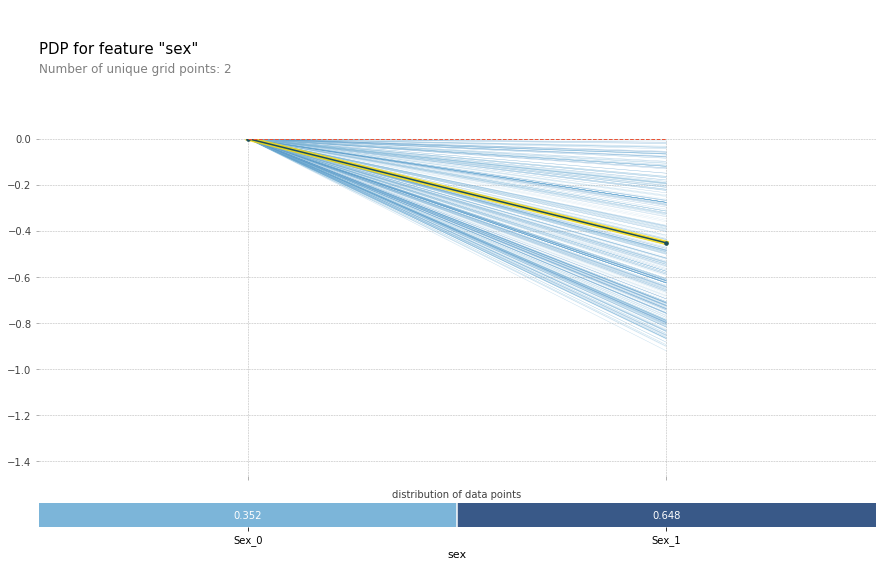

In [27]:
# more info
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

# 2. one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

## 2.1 target distribution through feature 'embarked'

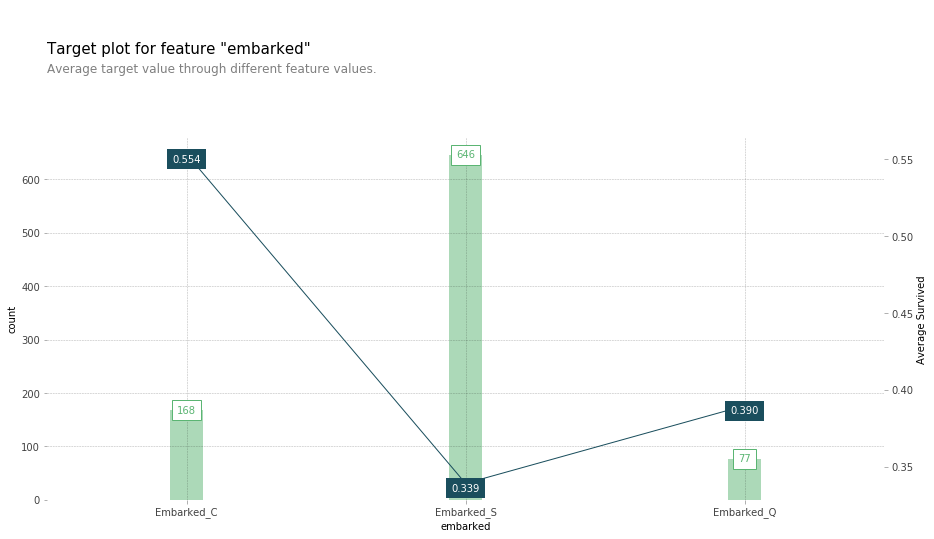

In [29]:
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_data, feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'], feature_name='embarked', 
    target=titanic_target
)

In [30]:
summary_df

,x,display_column,count,Survived
0,0,Embarked_C,168,0.553571
1,1,Embarked_S,646,0.339009
2,2,Embarked_Q,77,0.389610


## 2.2 check prediction distribution through feature 'embarked'

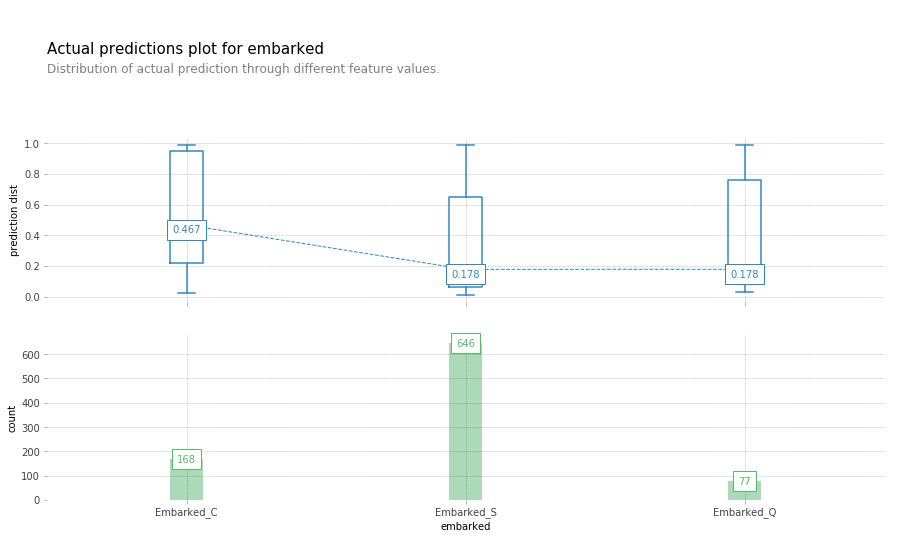

In [31]:
fig, axes, summary_df = info_plots.actual_plot(
    model=clf, X=titanic_data[titanic_features], feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'], 
    feature_name='embarked',predict_kwds=lgb_params
)

In [32]:
summary_df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,Embarked_C,168,0.216133,0.467468,0.946635
1,1,Embarked_S,646,0.065699,0.177701,0.647959
2,2,Embarked_Q,77,0.112610,0.178082,0.762116


## 2.3 pdp for feature 'embarked'

In [33]:
pdp_embark = pdp.pdp_isolate(
    model=clf, dataset=titanic_data, model_features=titanic_features, 
    feature=['Embarked_C', 'Embarked_S', 'Embarked_Q']
)

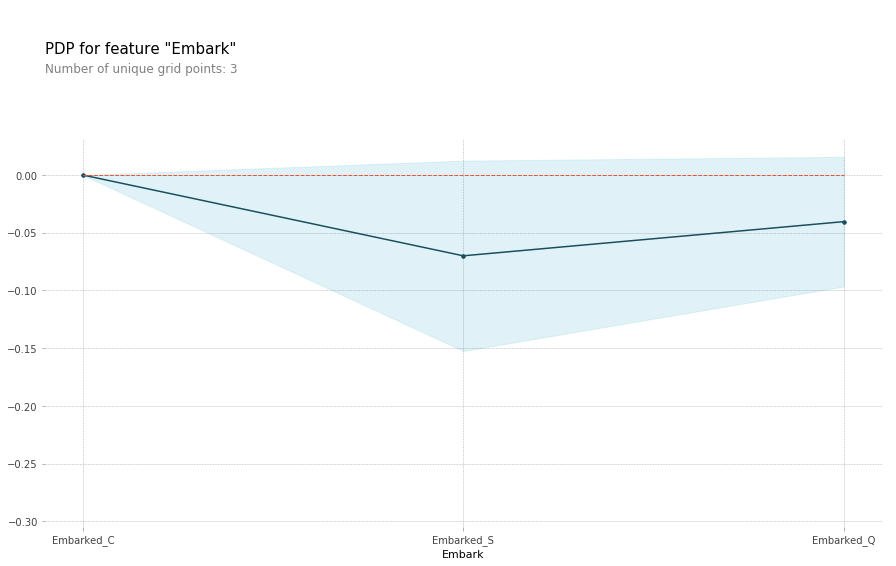

In [34]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark')

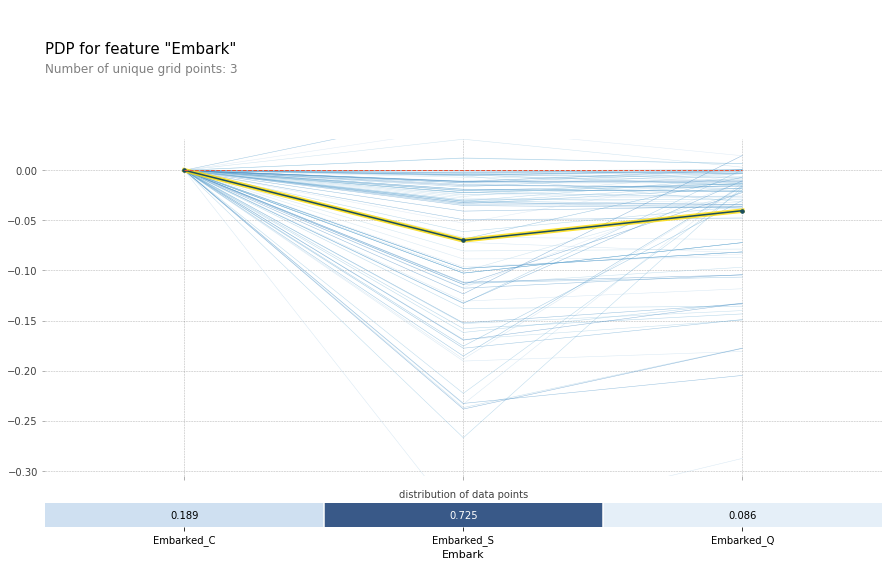

In [35]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

# 3. numeric feature: Fare

## 3.1 target distribution through feature 'Fare'

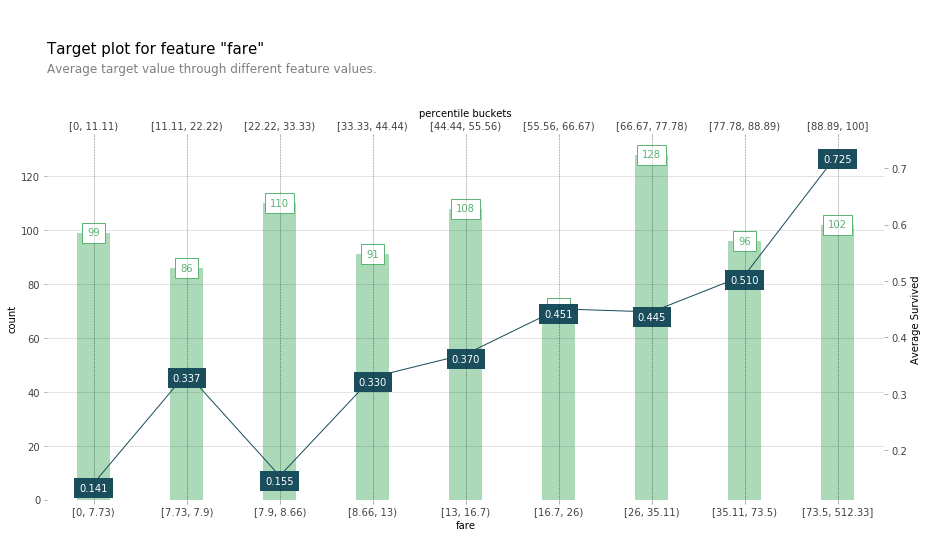

In [36]:
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_data, feature='Fare', feature_name='fare', target=titanic_target, show_percentile=True
)

In [20]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,Survived
0,0,"[0, 7.73)",0.000000,7.732844,"[0, 11.11)",0.00,11.11,99,0.141414
1,1,"[7.73, 7.9)",7.732844,7.895800,"[11.11, 22.22)",11.11,22.22,86,0.337209
2,2,"[7.9, 8.66)",7.895800,8.662500,"[22.22, 33.33)",22.22,33.33,110,0.154545
3,3,"[8.66, 13)",8.662500,13.000000,"[33.33, 44.44)",33.33,44.44,91,0.329670
4,4,"[13, 16.7)",13.000000,16.700000,"[44.44, 55.56)",44.44,55.56,108,0.370370
5,5,"[16.7, 26)",16.700000,26.000000,"[55.56, 66.67)",55.56,66.67,71,0.450704
6,6,"[26, 35.11)",26.000000,35.111111,"[66.67, 77.78)",66.67,77.78,128,0.445312
7,7,"[35.11, 73.5)",35.111111,73.500000,"[77.78, 88.89)",77.78,88.89,96,0.510417
8,8,"[73.5, 512.33]",73.500000,512.329200,"[88.89, 100]",88.89,100.00,102,0.725490


## 3.2 check prediction distribution through feature 'Fare'

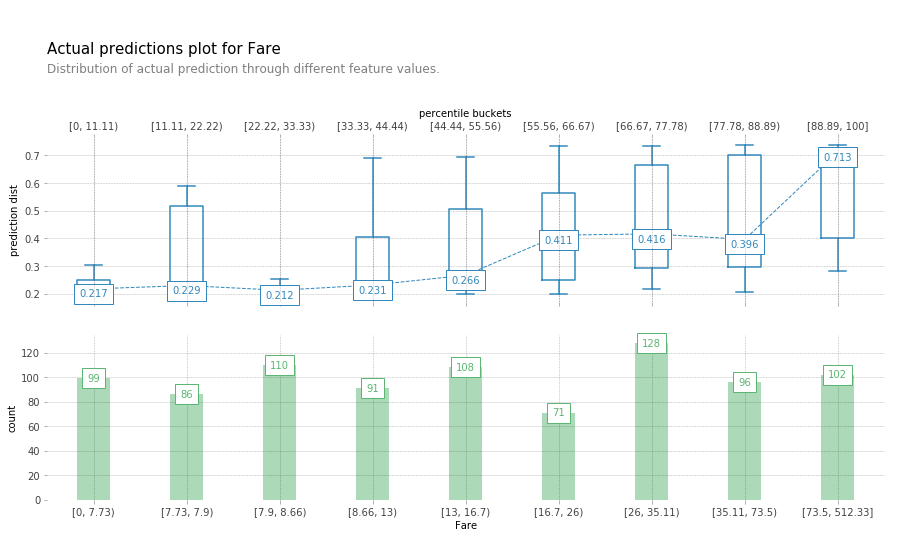

In [23]:
fig, axes, summary_df = info_plots.actual_plot(
    model=clf, X=titanic_data[titanic_features], feature='Fare', feature_name='Fare', 
    show_percentile=True,predict_kwds=lgb_params
)

In [22]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0, 7.73)",0.000000,7.732844,"[0, 11.11)",0.00,11.11,99,0.069861,0.099070,0.142362
1,1,"[7.73, 7.9)",7.732844,7.895800,"[11.11, 22.22)",11.11,22.22,86,0.107916,0.117240,0.614474
2,2,"[7.9, 8.66)",7.895800,8.662500,"[22.22, 33.33)",22.22,33.33,110,0.098939,0.116362,0.146534
3,3,"[8.66, 13)",8.662500,13.000000,"[33.33, 44.44)",33.33,44.44,91,0.114593,0.144842,0.530937
4,4,"[13, 16.7)",13.000000,16.700000,"[44.44, 55.56)",44.44,55.56,108,0.122154,0.168968,0.626364
5,5,"[16.7, 26)",16.700000,26.000000,"[55.56, 66.67)",55.56,66.67,71,0.146319,0.379385,0.805452
6,6,"[26, 35.11)",26.000000,35.111111,"[66.67, 77.78)",66.67,77.78,128,0.175587,0.353853,0.835547
7,7,"[35.11, 73.5)",35.111111,73.500000,"[77.78, 88.89)",77.78,88.89,96,0.223087,0.386497,0.929101
8,8,"[73.5, 512.33]",73.500000,512.329200,"[88.89, 100]",88.89,100.00,102,0.460539,0.914678,0.959526


## 3.3 pdp for feature 'Fare'

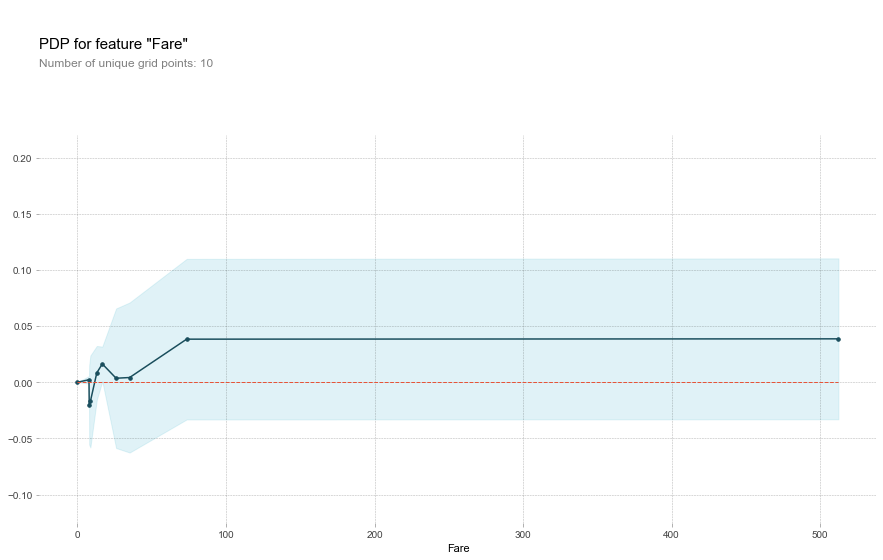

In [6]:
pdp_fare = pdp.pdp_isolate(
    model=clf, dataset=titanic_data, model_features=titanic_features, feature='Fare'
)
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare')

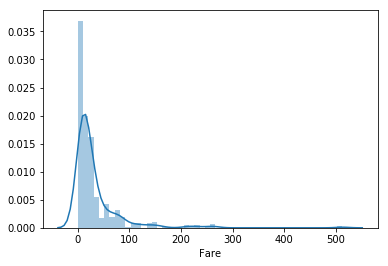

In [15]:
sns.distplot(titanic_data['Fare'])

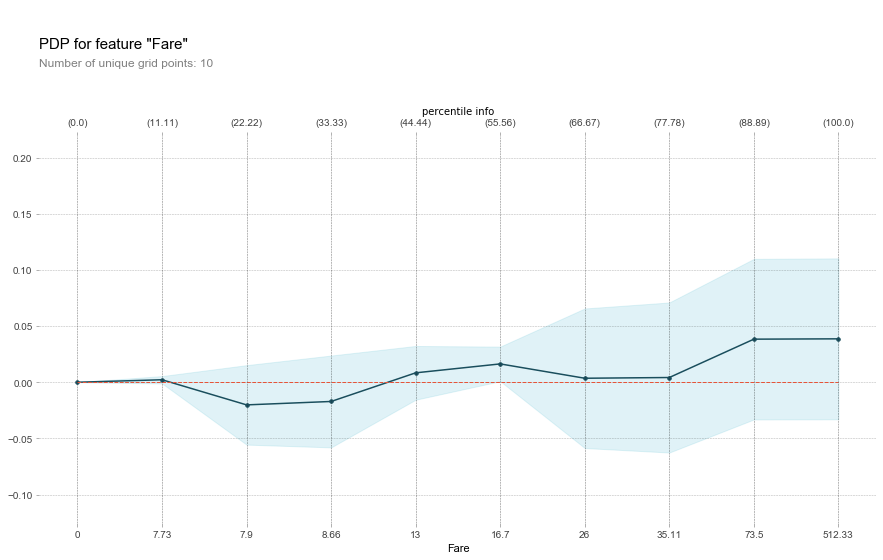

In [7]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, show_percentile=True,)

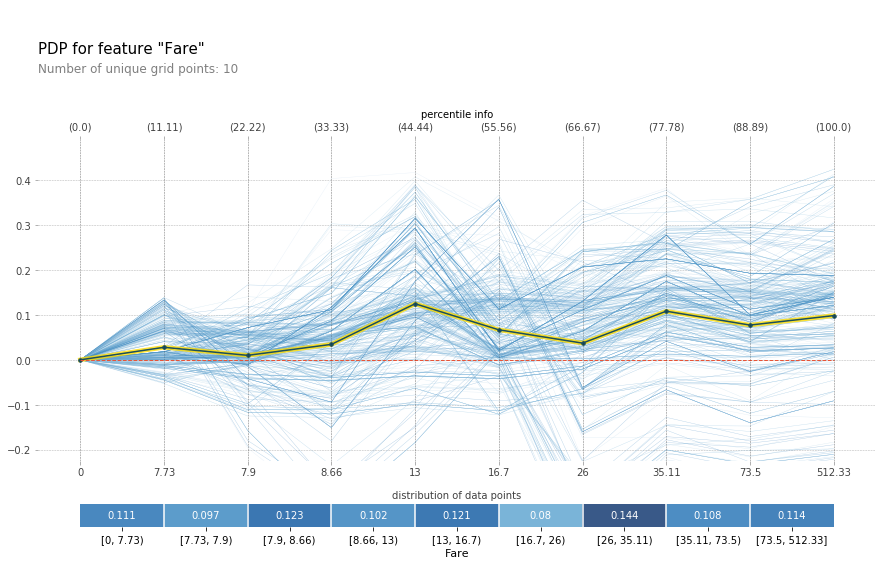

In [43]:
fig, axes = pdp.pdp_plot(
    pdp_fare, 'Fare', frac_to_plot=0.5, plot_lines=True, x_quantile=True, show_percentile=True, plot_pts_dist=True
)

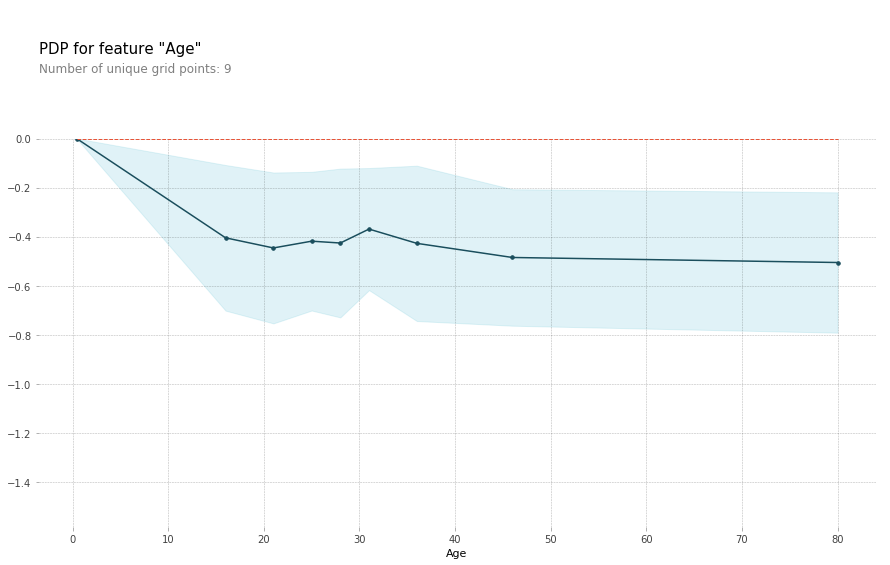

In [9]:
pdp_fare = pdp.pdp_isolate(
    model=clf, dataset=titanic_data, model_features=titanic_features, feature='Age'
)
fig, axes = pdp.pdp_plot(pdp_fare, 'Age')

# 4. Interaction between two variables: Age and Fare

## 4.1 target distribution through feature combination of 'Age' and 'Fare'

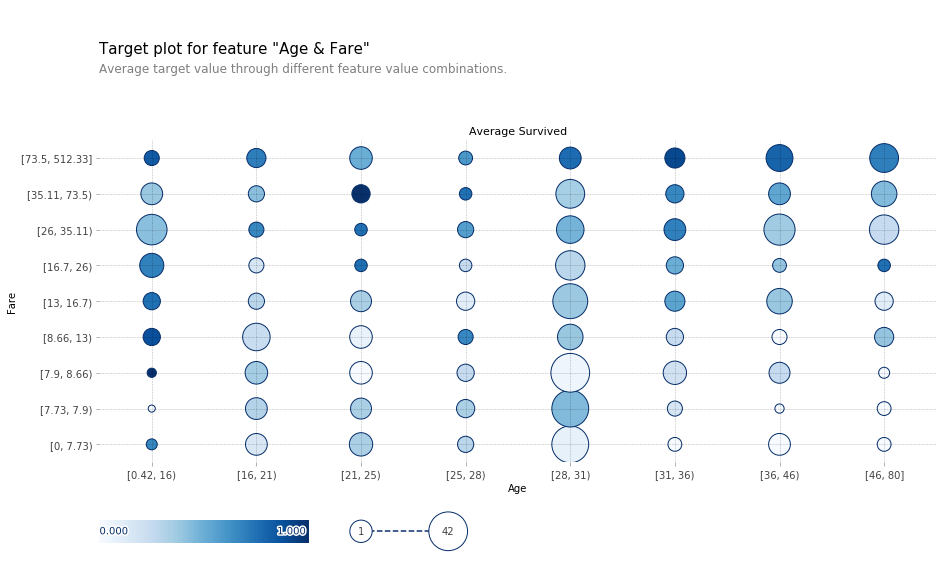

In [44]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=titanic_data, features=['Age', 'Fare'], feature_names=['Age', 'Fare'], target=titanic_target
)

In [28]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,Survived
0,0,0,"[0.42, 16)","[0, 7.73)",0.42,16.0,0.000000,7.732844,3,0.666667
1,0,1,"[0.42, 16)","[7.73, 7.9)",0.42,16.0,7.732844,7.895800,1,0.000000
2,0,2,"[0.42, 16)","[7.9, 8.66)",0.42,16.0,7.895800,8.662500,2,1.000000
3,0,3,"[0.42, 16)","[8.66, 13)",0.42,16.0,8.662500,13.000000,8,0.875000
4,0,4,"[0.42, 16)","[13, 16.7)",0.42,16.0,13.000000,16.700000,8,0.750000


## 4.2 prediction distribution through feature combination of 'Age' and 'Fare'

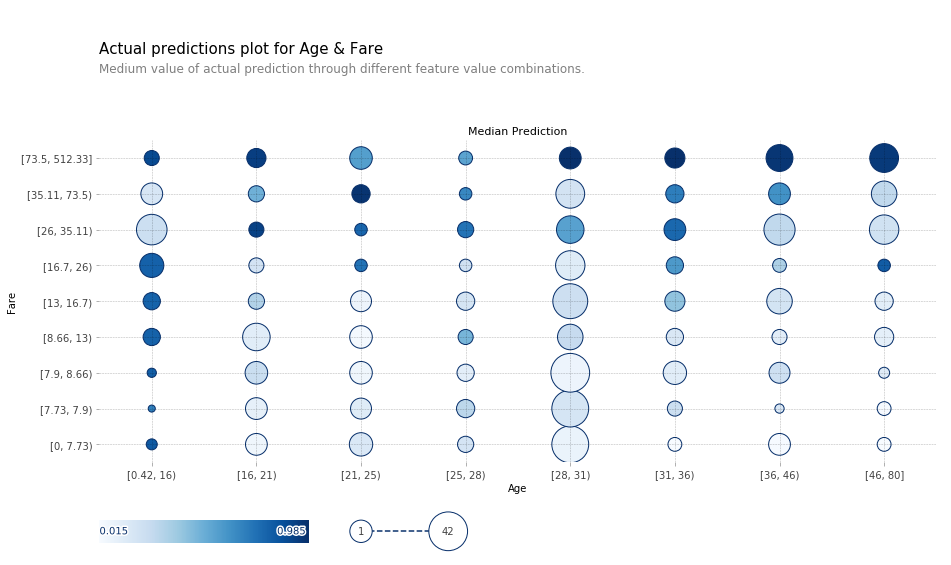

In [45]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=clf, X=titanic_data[titanic_features], features=['Age', 'Fare'], feature_names=['Age', 'Fare'],predict_kwds=lgb_params
)

In [46]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,value_lower_2,value_upper_2,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,0,"[0.42, 16)","[0, 7.73)",0.42,16.0,0.000000,7.732844,3,0.546132,0.828448,0.828448
1,0,1,"[0.42, 16)","[7.73, 7.9)",0.42,16.0,7.732844,7.895800,1,0.693043,0.693043,0.693043
2,0,2,"[0.42, 16)","[7.9, 8.66)",0.42,16.0,7.895800,8.662500,2,0.775110,0.812981,0.850853
3,0,3,"[0.42, 16)","[8.66, 13)",0.42,16.0,8.662500,13.000000,8,0.777587,0.796189,0.872130
4,0,4,"[0.42, 16)","[13, 16.7)",0.42,16.0,13.000000,16.700000,8,0.402466,0.792031,0.874845


## 4.3 pdp for feature combination of 'Age' and 'Fare'

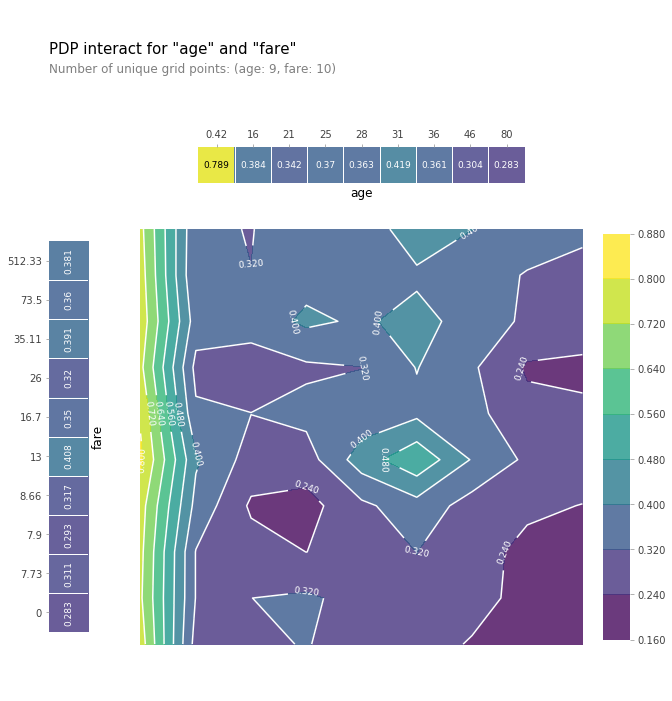

In [5]:
inter1 = pdp.pdp_interact(
    model=clf, dataset=titanic_data, model_features=titanic_features, features=['Age', 'Fare']
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=['age', 'fare'], plot_type='contour', x_quantile=True, plot_pdp=True
)

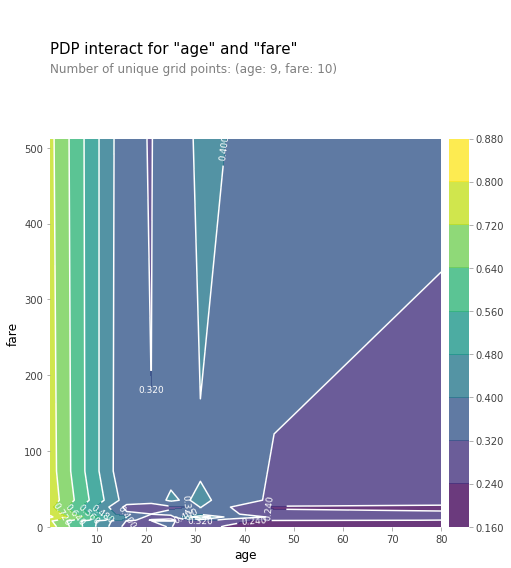

In [8]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='contour', x_quantile=False, plot_pdp=False)

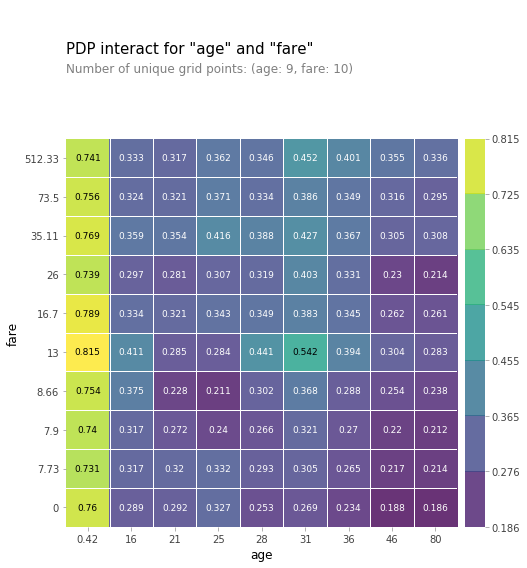

In [50]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='grid', x_quantile=True, plot_pdp=False)

In [54]:
titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

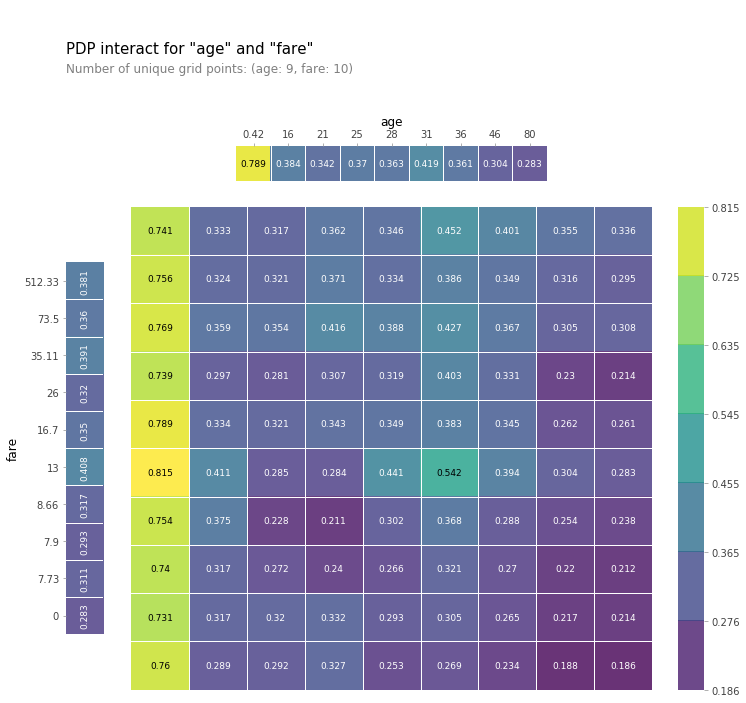

In [51]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='grid', x_quantile=True, plot_pdp=True)

# 5. numeric feature: Age

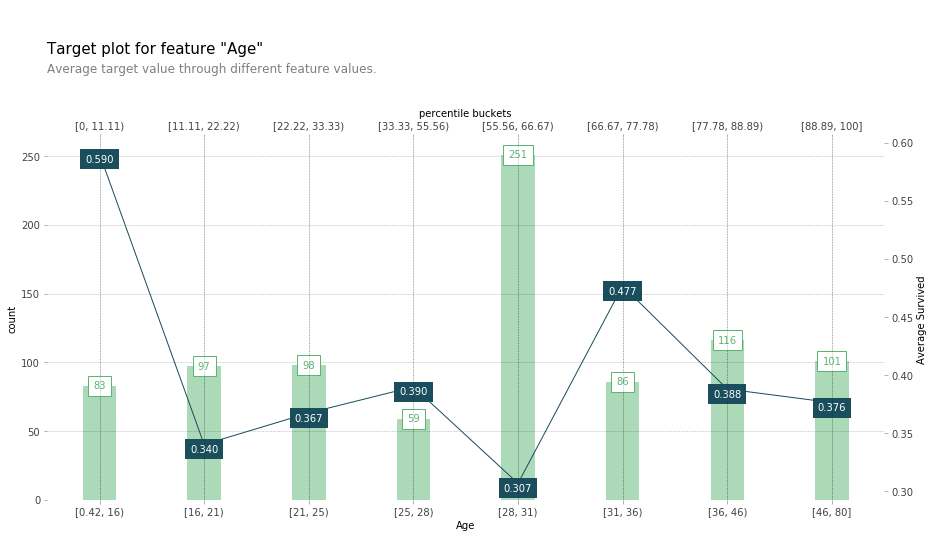

In [27]:
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_data, feature='Age', feature_name='Age', target=titanic_target, show_percentile=True
)

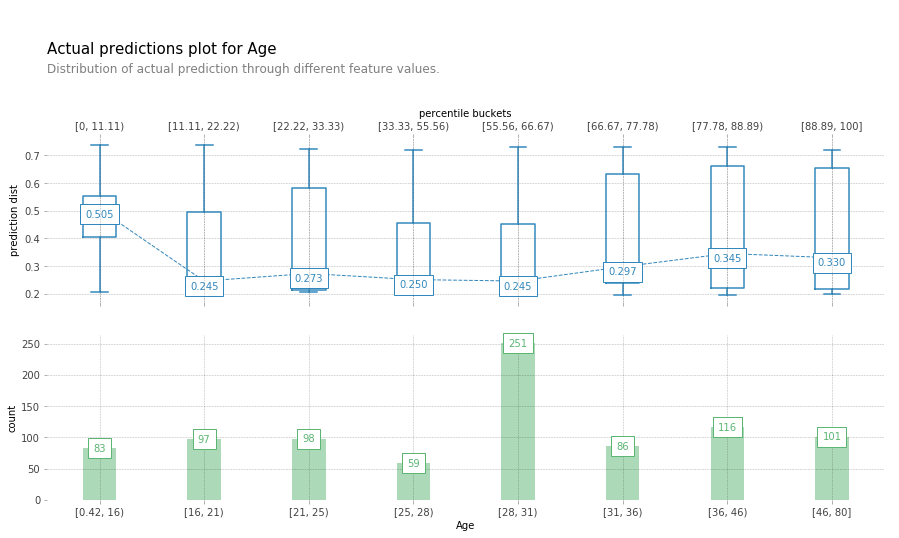

In [28]:
fig, axes, summary_df = info_plots.actual_plot(
    model=clf, X=titanic_data[titanic_features], feature='Age', feature_name='Age', 
    show_percentile=True,predict_kwds=lgb_params
)